In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving hfqpo_GRS1915.fits to hfqpo_GRS1915.fits


In [ ]:
from astropy import constants as const
from astropy import units as u
import math
from scipy.signal import find_peaks

Filename: hfqpo_GRS1915.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  COUNTS        1 BinTableHDU     76   1770496R x 4C   [1D, 1D, 1D, 1D]   
  2  STDGTI        1 BinTableHDU     41   2R x 2C   [1D, 1D]   
None
len of transf:  1770496


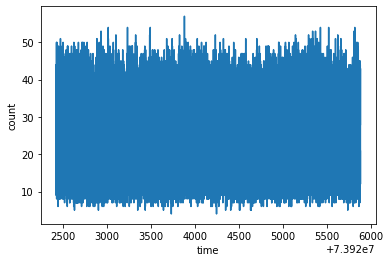

887295 887295


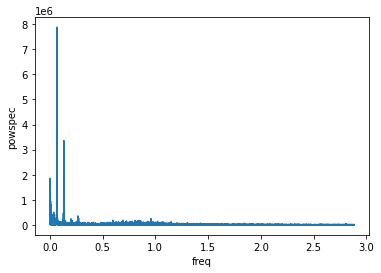

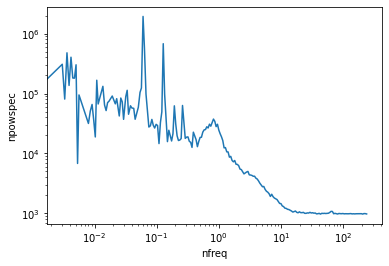

In [ ]:
file_name = "hfqpo_GRS1915.fits"

hdulist = fits.open(file_name)
print(hdulist.info())
time_list = hdulist[1].data["TIME"].tolist()
count_list = hdulist[1].data["COUNTS"].tolist()
hdulist.close()

#fourier transform
tres = time_list[1]-time_list[0]
tlen= time_list[len(time_list)-1]-time_list[0]


numb = len(time_list)
fres = 1/tlen
fmax = 1./(2*tres)
flen = int((fmax-fres)/fres+1)


#freq = np.arange(fres,fmax,fres)
freq = np.linspace(fres,fmax,flen)

transf = np.fft.fft(count_list)
print("len of transf: ", len(transf))
powspec = 2.0*abs(transf[1:int(flen)+1])*abs(transf[1:int(flen)+1])/sum(np.array(count_list)*tres)
#powspec = powspec[:-1]

#plotting

#without FT
plt.plot(time_list, count_list)
plt.ylabel("count")
plt.xlabel("time")
plt.show()


#with FT
print(len(freq), len(powspec))

plt.plot(freq[:10000],powspec[:10000])
plt.xlabel("freq")
plt.ylabel("powspec")
#plt.yscale("log")
plt.show()

#rebinning


factor = 1.05

n = len(powspec)
add = 0
if (freq[0] == 0):
  add = 1
istart = 0 + add
df = freq[1]-freq[0]
lowedge = freq[istart]-df/2
ilow=istart
k = 0
nfreq = np.zeros(n)
f_low = np.zeros(n)
f_high = np.zeros(n)
npow = np.repeat(powspec[0], n)
i = istart 
while True:
  if freq[n-1] < lowedge*(factor**1.5):
    i = n-1
  if freq[i]+df/2 > lowedge*factor or i == n-1:
      nfreq[k] = sum(freq[ilow:i])/(i-ilow+1) 
      npow[k] = sum(powspec[ilow:i])/(i-ilow+1)
      f_low[k] = freq[ilow]-df/2
      f_high[k] = freq[i]+df/2
      k = k+1
      lowedge = freq[i]+df/2
      ilow = i+1
  i = i+1
  if i >= n:
    break
nfreq = nfreq[0:k-1]
npow = npow[0:k-1]
f_low = f_low[0:k-1]
f_high = f_high[0:k-1]

plt.plot(nfreq,npow)
plt.xlabel("nfreq")
plt.ylabel("npowspec")
plt.yscale("log")
plt.xscale("log")
plt.show()


In [ ]:
#mass of grs1915
"""
	12.4+2.0 −1.8 M
"""
#M = 14 * const.M_sun
M = 12.4*const.M_sun

#finding peak freq
peak = np.max(npow)
peak_idx = np.where(npow==peak)
freq = nfreq[peak_idx]

#period
P = 1/freq * u.second
print("Period:",P)

R = (2*const.G *M)/((const.c)**2)
print("Schwarzshield radius:", R)

V = (2*math.pi*R) / P
print("Velocity1 is:",V)

V2 = np.sqrt((2*const.G*M)/R)
print("Velocity2 is:", V2)



Period: [16.58371341] s
Schwarzshield radius: 36620.300943643095 m
Velocity1 is: [13874.58473081] m / s
Velocity2 is: 299792458.0 m / s


In [ ]:
#time resolution TSA 

#time length 
time_len = len(time_list)

#time interval (s)
interval = 500 

i = 0
while i<len(time_list):
  new_time_list = time_list[i:i+interval]
  new_count_list = count_list[i:i+interval]
  #fourier transform
  tres = new_time_list[1]-new_time_list[0]
  tlen= new_time_list[len(new_time_list)-1]-new_time_list[0]


  numb = len(new_time_list)
  fres = 1/tlen
  fmax = 1./(2*tres)
  flen = int((fmax-fres)/fres+1)

  freq = np.linspace(fres,fmax,flen)

  transf = np.fft.fft(new_count_list)
  powspec = 2.0*abs(transf[1:int(flen)+1])*abs(transf[1:int(flen)+1])/sum(np.array(new_count_list)*tres)

"""
  #plotting
  plt.plot(freq,powspec)
  plt.xlabel("freq")
  plt.ylabel("powspec")
  plt.yscale("log")
  plt.xscale("log")
  plt.show()
"""

  i+=interval
  

IndentationError: ignored

In [ ]:
#find the event horizon 

V_eh_min = 0.9*const.c
V_eh_max = const.c

P_eh_min = (2*math.pi*R)/V_eh_min 
P_eh_max = (2*math.pi*R)/V_eh_max 

f_min = 1/P_eh_min
f_max = 1/P_eh_max
print(f_min,f_max)



1172.6311725077942 1 / s 1302.9235250086601 1 / s
